# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
pip install pandas requests

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



609

In [10]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bantogon
Processing Record 5 of Set 1 | neiafu
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | yusva
City not found. Skipping...
Processing Record 13 of Set 1 | carutapera
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | oranjestad
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | rockport
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ambulu
Processing Record 21 of Set 1 

Processing Record 38 of Set 4 | bethel
Processing Record 39 of Set 4 | jutai
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | svetlaya
Processing Record 42 of Set 4 | tabou
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | sao desiderio
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 0 of Set 5 | borama
City not found. Skipping...
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | erenhot
Processing Record 3 of Set 5 | vicuna
Processing Record 4 of Set 5 | worland
Processing Record 5 of Set 5 | pangnirtung
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | haibowan
City not found. Skipping...
Processing Record 10 of Set 5 | chimbot

Processing Record 27 of Set 8 | souillac
Processing Record 28 of Set 8 | novo oriente
Processing Record 29 of Set 8 | kyaukse
Processing Record 30 of Set 8 | sergeyevka
Processing Record 31 of Set 8 | aksay
Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | taganak
Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | fayaoue
Processing Record 37 of Set 8 | todos santos
Processing Record 38 of Set 8 | miles city
Processing Record 39 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 8 | duz
City not found. Skipping...
Processing Record 41 of Set 8 | tabuk
Processing Record 42 of Set 8 | tidore
City not found. Skipping...
Processing Record 43 of Set 8 | zehdenick
Processing Record 44 of Set 8 | wewak
Processing Record 45 of Set 8 | conde
Processing Record 46 of Set 8 | baiyin
Processing Record 47 of Set 8 | akersberga
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Se

Processing Record 12 of Set 12 | carnaiba
Processing Record 13 of Set 12 | kuanshan
City not found. Skipping...
Processing Record 14 of Set 12 | tezu
Processing Record 15 of Set 12 | puri
Processing Record 16 of Set 12 | zyryanka
Processing Record 17 of Set 12 | alyangula
Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | aloleng
Processing Record 20 of Set 12 | fukue
Processing Record 21 of Set 12 | dubbo
Processing Record 22 of Set 12 | voronezhskaya
Processing Record 23 of Set 12 | vega baja
Processing Record 24 of Set 12 | calama
Processing Record 25 of Set 12 | rajula
Processing Record 26 of Set 12 | laurel
Processing Record 27 of Set 12 | hailar
Processing Record 28 of Set 12 | san policarpo
Processing Record 29 of Set 12 | almeria
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | nichinan
Processing Record 32 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 33 of Set 12 | tommot
Processing Record 34 of Set 12 | show

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# establish dataframe
weather_dataframe = pd.DataFrame(city_data)

# show the top of the dataframe
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.64,-120.46,78.80,56,1,3.36,US,1600802637
1,saskylakh,71.92,114.08,43.18,71,0,13.76,RU,1600802612
2,puerto ayora,-0.74,-90.35,71.01,78,96,10.00,EC,1600802638
3,bantogon,6.53,124.03,78.24,75,62,3.94,PH,1600802590
4,neiafu,-18.65,-173.98,73.40,94,75,4.70,TO,1600802638


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:

# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Show Record Count
city_data_pd.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [48]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.64,-120.46,78.80,56,1,3.36,US,1600802637
1,saskylakh,71.92,114.08,43.18,71,0,13.76,RU,1600802612
2,puerto ayora,-0.74,-90.35,71.01,78,96,10.00,EC,1600802638
3,bantogon,6.53,124.03,78.24,75,62,3.94,PH,1600802590
4,neiafu,-18.65,-173.98,73.40,94,75,4.70,TO,1600802638


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [89]:
northern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] < 0]

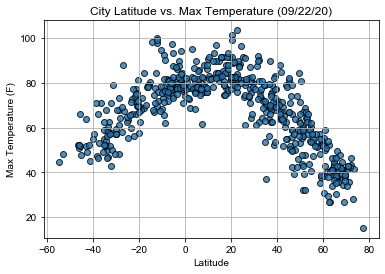

In [51]:
import seaborn as sns

# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

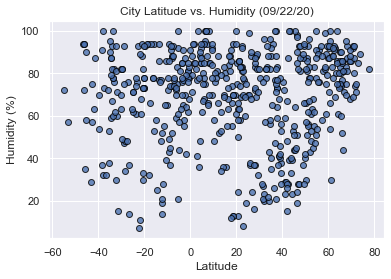

In [52]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

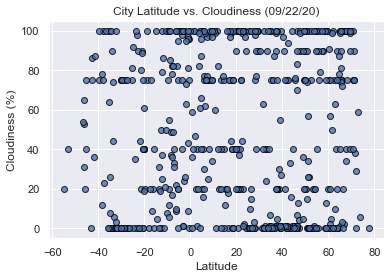

In [53]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

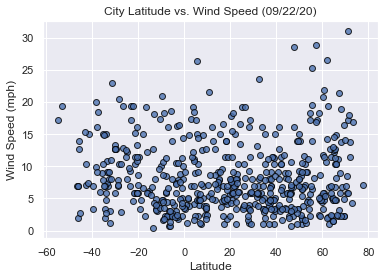

In [54]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

The r-squared is : -0.83


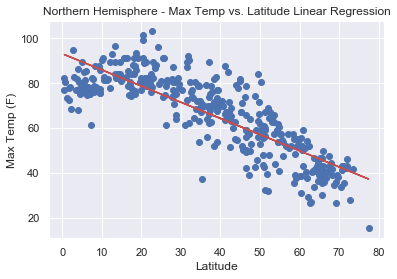

In [93]:
from scipy import stats
import scipy.stats as st

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.79


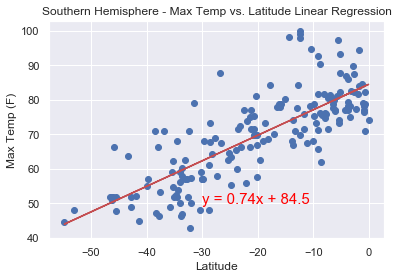

In [94]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05


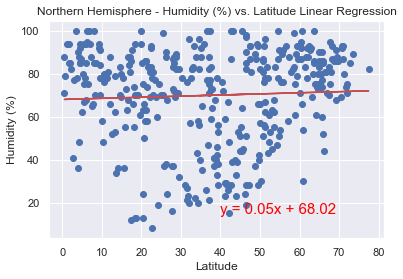

In [95]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05


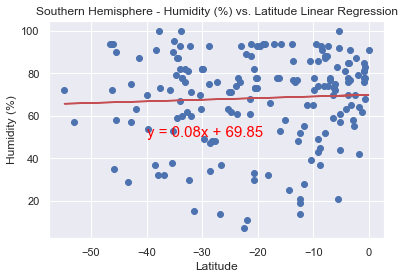

In [96]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.05


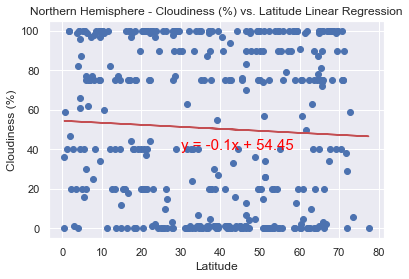

In [97]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2


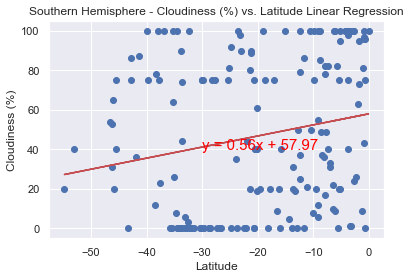

In [98]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


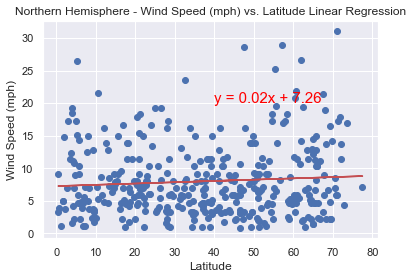

In [99]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


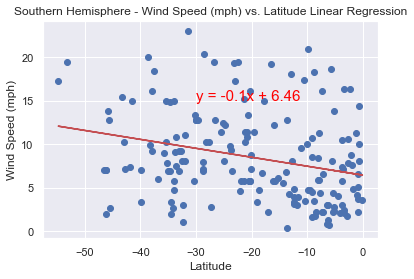

In [100]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
#Observations:

#As suspected, temperature increases as we approach the equator. 

#The temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. 

#Cloudiness and humidity do not show a definite correlation to latitude, we would need more information.
